# ROS ALE Figure 2

Generates the pie charts for Figure 2 from the manuscript "Lab evolution and advanced data analytics reveal systems biology of ROS tolerance" by Kevin Rychel et al., 2022.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Generate-Figure" data-toc-modified-id="Generate-Figure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate Figure</a></span><ul class="toc-item"><li><span><a href="#Gene-Pie-Charts" data-toc-modified-id="Gene-Pie-Charts-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gene Pie Charts</a></span></li><li><span><a href="#iModulon-Pie-Charts" data-toc-modified-id="iModulon-Pie-Charts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>iModulon Pie Charts</a></span></li><li><span><a href="#Legend-Colorbar" data-toc-modified-id="Legend-Colorbar-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Legend Colorbar</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
# use py file to set up workspace
from src.ros_ale_functions import *

# load data
ica = load_json_model('input/precise1k_kr.json')
ros_meta = pd.read_csv('input/ros_ale_p1k_metadata.csv',
                       index_col = 0)
mutations = pd.read_excel('input/S1_ros_ale_mutations.xlsx',
                          index_col = 0)

# choose an output folder; this generates a file for each pie
out_dir = 'output/fig2_raw_pies/'

## Generate Figure

Pies were arranged and other figure elements were added in Adobe Illustrator.

### Gene Pie Charts

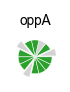

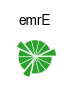

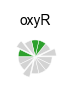

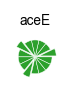

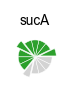

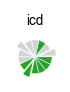

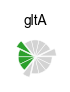

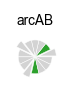

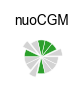

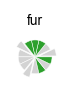

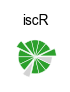

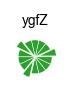

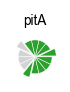

In [2]:
# only generate the necessary pies for the figure
genes = ['oppA', 'emrE', 'oxyR', 'aceE', 'sucA', 'icd',
         'gltA', 'arcAB', 'nuoCGM', 'fur', 'iscR', 'ygfZ',
         'pitA']
combined_genes = {'arcAB':['arcA', 'arcB'],
                  'nuoCGM':['nuoC', 'nuoG', 'nuoM']}

# if you would like to generate all gene pies, use this:
# genes = set(', '.join(all_mutations.Gene).split(', '))

for g_name in genes:
    # account for combined genes
    g = combined_genes.get(g_name, g_name)
    
    # draw figure & title
    ax, patches, text = mut_pie(mutations, ros_meta, g, g_name)
    
    # save
    plt.savefig(out_dir + 'gene_pie_' + g_name + '.pdf')
    plt.show()

### iModulon Pie Charts

/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:848: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


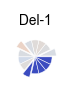

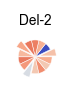

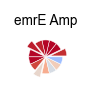

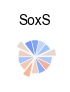

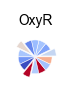

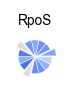

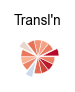

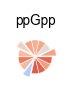

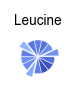

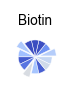

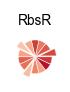

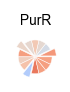

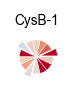

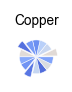

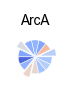

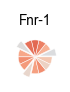

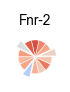

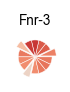

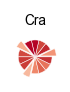

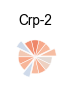

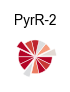

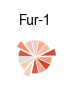

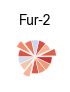

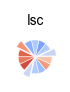

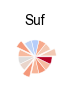

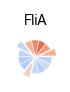

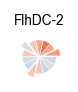

In [3]:
# only generate the necessary pies for the figure
iMs = ['ROS TALE Del-1', 'ROS TALE Del-2', 'ROS TALE Amp',
       'Superoxide', 'OxyR', 'RpoS', 'Translation', 'ppGpp',
       'Leucine', 'Biotin', 'Ribose', 'Purine', 'Cysteine-1',
       'Copper', 'ArcA', 'Fnr-1', 'Fnr-2', 'Fnr-3', 'Cra', 
       'Crp-2', 'Pyruvate-2', 'Fur-1', 'Fur-2', 'Isc System', 
       'Suf System', 'FliA', 'FlhDC-2']
       
iM_names = {'ROS TALE Del-1': 'Del-1',
            'ROS TALE Del-2': 'Del-2',
            'ROS TALE Amp': 'emrE Amp',
            'Superoxide': 'SoxS',
            'Translation': 'Transl\'n',
            'Pyruvate-2': 'PyrR-2',
            'Ribose':'RbsR',
            'Purine': 'PurR',
            'Cysteine-1': 'CysB-1',
            'Isc System': 'Isc',
            'Suf System': 'Suf'}

# if you would like to generate all iModulon pies, use this:
# iMs = ica.imodulon_names

for k in iMs:
    iM_name = iM_names.get(k, k)
    
    # draw figure & title
    ax, patches, text = iM_pie(ica, ros_meta, k, iM_name)
    
    # save
    #plt.savefig(out_dir + 'iM_pie_' + iM_name + '.pdf')
    plt.show()

### Legend Colorbar

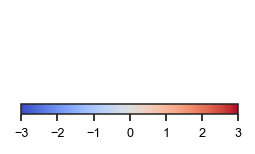

In [4]:
cmap = matplotlib.cm.get_cmap('coolwarm')
norm = matplotlib.colors.Normalize(-3, 3)

fig, ax = plt.subplots(figsize = (2, 1), dpi = 140)
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap = cmap),
             location = 'bottom', ticks = range(-3, 4))
cbar.ax.tick_params(labelsize = 6.5)
ax.axis('off')
plt.savefig(out_dir+'colorbar.pdf')